In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

from tqdm import tqdm
tqdm.pandas(desc='progress bar:')

import numpy as np

In [2]:
def check_text(s):
    for symbol in s:
        if symbol not in "\" abcdefghijklmnopqrstuvwxyz'":
            return ('FAIL',symbol)
    else:
        return 'OK'

In [3]:
import Levenshtein
def calcWer(s1, s2):
    s1 = str(s1)
    s2 = str(s2)
    b = set(s1.split() + s2.split())
    word2char = dict(zip(b, range(len(b))))
    w1 = [chr(word2char[w]) for w in s1.split()]
    w2 = [chr(word2char[w]) for w in s2.split()]
    return Levenshtein.distance(''.join(w1), ''.join(w2)) / len(''.join(w2)) 

In [4]:
df = pd.read_csv("./uz_golden1.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           7729 non-null   int64  
 1   audio                        7729 non-null   object 
 2   golden_status                7729 non-null   object 
 3   status                       7729 non-null   object 
 4   transcriber                  7729 non-null   object 
 5   superviser                   7729 non-null   object 
 6   golden_transcription         7729 non-null   object 
 7   transcriber_transcription    7729 non-null   object 
 8   theme                        7729 non-null   object 
 9   robot_transcription          7729 non-null   object 
 10  timestamp_create             7729 non-null   int64  
 11  timestamp_change             7729 non-null   int64  
 12  transcriber_id               7729 non-null   int64  
 13  superviser_id     

In [6]:
df["bad"] = df["golden_transcription"].apply(lambda x: check_text(x))

In [7]:
ind_drop = df[df["bad"] != "OK"].index

In [8]:
ind_drop

Index([], dtype='int64')

In [9]:
df["language"] = df["language"].str.lower()

In [10]:
df["language"].value_counts()

language
uz        6960
uzru       429
uzru3      210
ru         126
kar          2
uz/kar       2
Name: count, dtype: int64

In [11]:
df["language"] = df["language"].str.replace("uzru", "uz")

In [12]:
df["language"].value_counts()

language
uz        7389
uz3        210
ru         126
kar          2
uz/kar       2
Name: count, dtype: int64

In [13]:
df["language"] = df["language"].str.replace("uz3", "uz")

In [14]:
df["language"].value_counts()

language
uz        7599
ru         126
kar          2
uz/kar       2
Name: count, dtype: int64

In [15]:
df["language"] = df["language"].str.replace("uz/kar", "uz")

In [16]:
df["language"].value_counts()

language
uz     7601
ru      126
kar       2
Name: count, dtype: int64

In [17]:
ind_drop = df[df["language"] == "kar"].index

In [18]:
ind_drop

Index([171, 5044], dtype='int64')

In [19]:
df.drop(ind_drop, inplace=True)

In [20]:
df["language"].value_counts()

language
uz    7601
ru     126
Name: count, dtype: int64

In [21]:
lang_drop = df[df["language"] == "ru"].index

In [22]:
lang_drop

Index([  15,   16,   23,   24,   39,   43,  116,  136,  145,  148,
       ...
       7289, 7322, 7326, 7335, 7391, 7399, 7466, 7518, 7665, 7726],
      dtype='int64', length=126)

In [23]:
df.drop(lang_drop, inplace=True)

In [24]:
lang_drop = df[df["language"] == "ru"].index

In [25]:
lang_drop

Index([], dtype='int64')

In [26]:
df['wer'] = df[['transcriber_transcription', 'golden_transcription']].apply(lambda x:calcWer(x.transcriber_transcription, x.golden_transcription), axis=1)

In [27]:
df[df['wer'] > 0.5]["wer"].value_counts()

wer
1.000000    130
0.666667     38
2.000000     24
0.750000     11
0.600000     10
1.500000      3
0.571429      3
0.800000      2
0.625000      2
1.333333      2
3.000000      2
0.545455      1
1.666667      1
2.333333      1
4.500000      1
9.000000      1
1.166667      1
2.500000      1
0.583333      1
1.200000      1
6.500000      1
4.000000      1
0.642857      1
Name: count, dtype: int64

In [28]:
df[df['wer'] > 0.5][["golden_transcription", "transcriber_transcription", "wer"]]

,golden_transcription,transcriber_transcription,wer
50,plastikk krata orqali,plastik karta orqali,0.666667
52,haa,hop,1.000000
66,bo'pti hop,bo'ldi to'g'ri,1.000000
96,aha,mxm,1.000000
180,yo'q,yo'g'e,1.000000
...,...,...,...
7593,allo,ha allo,1.000000
7600,sababi oylik bermagani sabab,hozir oylik bermagan salom,0.750000
7602,ssalom,salom,1.000000
7662,opa ana u aaa o'ninchigacha oyligim tushadi,opa anavi o'ninchigacha oyligimiz tushadi,0.571429


In [29]:
wer_drop = df[df['wer'] > 0.5].index

In [30]:
len(wer_drop)

239

In [31]:
df.drop(wer_drop, inplace=True)

In [32]:
audio0_drop = df[df["audio"].str.contains("audio0")].index

In [50]:
df[df["audio"].str.contains("audio0")]["golden_transcription"].value_counts()

golden_transcription
assalomu alaykum                          1546
allo assalomu alaykum                      125
va alaykum                                  53
assalomu alaykum va alaykum assalom         27
eshitaman                                   27
                                          ... 
assalomu alaykum allo assalomu alaykum       1
ha men                                       1
allo eshityapman eshityapman                 1
va alaykum assalom ha                        1
bo'ldi bo'ldi yaxshi                         1
Name: count, Length: 171, dtype: int64

In [35]:
df[df["audio"].str.contains("audio0")]["golden_transcription"].value_counts()

golden_transcription
assalomu alaykum                          1546
allo                                       521
va alaykum assalom                         438
allo assalomu alaykum                      125
va alaykum                                  53
                                          ... 
assalomu alaykum allo assalomu alaykum       1
ha men                                       1
allo eshityapman eshityapman                 1
va alaykum assalom ha                        1
bo'ldi bo'ldi yaxshi                         1
Name: count, Length: 173, dtype: int64

In [36]:
df["golden_transcription"] = df["golden_transcription"].str.strip()

In [37]:
df["length"] = df["golden_transcription"].str.split().str.len()

In [38]:
df["length"].value_counts()

length
2     2634
3     1393
1     1342
4      642
5      491
6      275
7      221
8      152
9       84
10      48
11      35
12      17
13       9
14       8
15       4
18       2
16       2
19       1
21       1
17       1
Name: count, dtype: int64

In [51]:
df[df["length"] == 1]["golden_transcription"].value_counts()

golden_transcription
ertaga           52
aha              50
hop              42
yo'q             38
tushunmadim      38
                 ..
opa               1
to'landi          1
ertadan           1
sakkizinchida     1
nechinchida       1
Name: count, Length: 109, dtype: int64

In [40]:
allo_ind = df[(df["golden_transcription"].str.contains("allo")) & (df["length"] == 1)].index

In [41]:
df.drop(allo_ind, inplace=True)

In [64]:
df[df["length"] == 1]["golden_transcription"].value_counts().head(25)

golden_transcription
ertaga           52
aha              50
hop              42
yo'q             38
tushunmadim      38
ha               33
eshitaman        27
bugun            19
mxm              14
albatta          14
kim              13
labbay           10
nimani            9
yaxshimisiz       8
to'layman         8
bo'ladi           8
tushunarli        6
yaxshi            6
salom             6
kartadan          6
hozir             6
eshityapsizmi     6
to'g'ri           4
kimsiz            4
men               4
Name: count, dtype: int64

In [63]:
df[df["length"] == 2]["golden_transcription"].value_counts().head(25)

golden_transcription
ha ha                  60
va alaykum             53
ha menman              29
allo allo              28
ha men                 25
bo'ladi bo'ladi        19
yo'q yo'q              16
xudo xohlasa           16
harakat qilamiz        15
nima deysiz            14
hop hop                13
kim bu                 11
ha to'laymiz           11
ertaga to'layman       11
ha to'layman           10
qanaqa kredit          10
ertaga ertaga           9
allo eshitaman          9
harakat qilaman         9
ha eshitaman            8
to'laymiz to'laymiz     8
karta orqali            7
to'layman to'layman     7
bugun bugun             7
qaysi bank              7
Name: count, dtype: int64

In [62]:
df[df["length"] == 3]["golden_transcription"].value_counts().head(30)

golden_transcription
allo assalomu alaykum           127
assalomu alaykum allo            24
assalomu alaykum yaxshimisiz     18
ha ha ha                         17
assalomu alaykum eshitaman       12
ha ha men                        10
bugun to'lay olmayman             7
ha men men                        7
ha xudo xohlasa                   6
ha karta orqali                   6
ha ha to'laymiz                   6
assalomu alaykum labbay           6
ha to'layman to'layman            5
ha ha menman                      5
qaysi bank bu                     5
oyning oxirigacha to'layman       4
shu haftani oxirigacha            4
ha assalomu alaykum               4
ha ha to'layman                   4
qayerdan telefon qilyapsiz        4
ha bugun to'laymiz                4
labbay assalomu alaykum           4
ha menman ha                      4
eshitaman assalomu alaykum        4
va alaykum allo                   4
oylik tushgandan keyin            3
ertaga xudo xohlasa               3
ha xudd

In [47]:
ind_drop = df[df["golden_transcription"].str.contains("va alaykum assalom") & (df["length"] < 4)].index

In [48]:
df.drop(ind_drop, inplace=True)

In [56]:
ind_drop = df[df["golden_transcription"].str.contains("assalomu alaykum") & (df["length"] < 3)].index

In [58]:
len(ind_drop)

1553

In [60]:
df.drop(ind_drop, inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4577 entries, 0 to 7728
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           4577 non-null   int64  
 1   audio                        4577 non-null   object 
 2   golden_status                4577 non-null   object 
 3   status                       4577 non-null   object 
 4   transcriber                  4577 non-null   object 
 5   superviser                   4577 non-null   object 
 6   golden_transcription         4577 non-null   object 
 7   transcriber_transcription    4577 non-null   object 
 8   theme                        4577 non-null   object 
 9   robot_transcription          4577 non-null   object 
 10  timestamp_create             4577 non-null   int64  
 11  timestamp_change             4577 non-null   int64  
 12  transcriber_id               4577 non-null   int64  
 13  superviser_id          

In [65]:
df.rename(columns={'audio': 'audio_filepath', 'golden_transcription': 'text', 'language': 'lang'}, inplace=True)

In [66]:
df["lang"].value_counts()

lang
uz    4577
Name: count, dtype: int64

In [67]:
df[['audio_filepath',  'duration', 'text', 'lang']]

,audio_filepath,duration,text,lang
0,audio23_9313130_1697620588_972938800_1697620665-in.wav,2.06,shunday shunday,uz
3,audio3_9287246_1697191674_975521818_1697191697-in.wav,3.08,ha menman qaysi kompaniyadan,uz
4,audio3_9399403_1698662797_944217471_1698662819-in.wav,2.06,kim deysiz,uz
5,audio34_9306935_1697537670_911918403_1697537726-in.wav,6.16,shu click orqali,uz
6,audio3_9338059_1698052379_931970606_1698052401-in.wav,1.04,da ha ha,uz
...,...,...,...,...
7722,audio3_9789857_1702304779_912199292_1702304803-in.wav,4.10,plastigimga pul tushmadi,uz
7723,audio3_9781645_1702284156_934096045_1702284187-in.wav,4.10,bo'ldi men to'lov qilib qo'yaman ikki million,uz
7724,audio3_9735587_1701941794_935456766_1701941834-in.wav,4.10,hali tushmadida nimaga kartaga o'shanga,uz
7725,audio39_9746016_1701960238_979600609_1701960307-in.wav,3.14,qarzni bugun to'ladim men,uz


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4577 entries, 0 to 7728
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           4577 non-null   int64  
 1   audio_filepath               4577 non-null   object 
 2   golden_status                4577 non-null   object 
 3   status                       4577 non-null   object 
 4   transcriber                  4577 non-null   object 
 5   superviser                   4577 non-null   object 
 6   text                         4577 non-null   object 
 7   transcriber_transcription    4577 non-null   object 
 8   theme                        4577 non-null   object 
 9   robot_transcription          4577 non-null   object 
 10  timestamp_create             4577 non-null   int64  
 11  timestamp_change             4577 non-null   int64  
 12  transcriber_id               4577 non-null   int64  
 13  superviser_id          

In [82]:
df.iloc[:,1] = df.iloc[:,1].apply(lambda x: f"/home/user/TRANSDUCER_r1.11.0/DATA/UZ/asr_uz/{x}")

In [83]:
with open('./uz_new_test_manifest.json', 'w', encoding='utf-8') as file:
    df[['audio_filepath',  'duration', 'text', 'lang']].to_json(file, orient='records', lines=True, force_ascii=False)

In [68]:
df["duration"].value_counts()

duration
3.080000     1353
4.100000      819
2.060000      784
5.140000      499
6.160000      200
             ... 
4.280000        1
12.960000       1
6.260000        1
6.210023        1
7.300000        1
Name: count, Length: 165, dtype: int64

In [69]:
df["length_duration"] = df["length"]/df["duration"]

In [70]:
df["length_duration"].value_counts()

length_duration
0.974026    407
0.649351    396
0.970874    357
1.298701    251
0.485437    237
           ... 
0.569258      1
0.813005      1
0.365854      1
0.340136      1
1.904748      1
Name: count, Length: 415, dtype: int64

<AxesSubplot:>

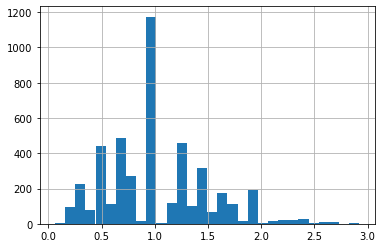

In [71]:
df['length_duration'].hist(bins=30)

In [75]:
df[df['length_duration'] < 0.3][['audio_filepath',  'duration', 'text', 'lang']]

,audio_filepath,duration,text,lang
98,audio0_9393997_1698576333_919090505_1698576351-in.wav,9.22,allo allo,uz
124,audio3_9399485_1698663716_972429202_1698663761-in.wav,12.30,ha menman allo,uz
328,audio74_9333372_1697886102_997267001_1697886178-in.wav,4.10,tushunmadim,uz
344,audio34_9458377_1699101789_908063021_1699101858-in.wav,4.10,kartadan,uz
381,audio0_9525578_1699432713_883040469_1699432726-in.wav,9.22,allo allo,uz
...,...,...,...,...
7469,audio0_9721685_1701848931_973310708_1701848949-in.wav,5.14,eshitaman,uz
7517,audio3_9741648_1701952235_999613009_1701952289-in.wav,4.12,haa,uz
7532,audio3_9722735_1701860667_975669066_1701860703-in.wav,15.38,o'n beshinchida o'n besh,uz
7634,audio39_9746220_1701960635_973140314_1701960738-in.wav,4.14,nechinchida,uz


In [79]:
df[(df['length_duration'] < 0.3) & (df['duration'] > 6) & (df["length"] < 3)][['audio_filepath',  'duration', 'text', 'lang']]

,audio_filepath,duration,text,lang
98,audio0_9393997_1698576333_919090505_1698576351-in.wav,9.220000,allo allo,uz
381,audio0_9525578_1699432713_883040469_1699432726-in.wav,9.220000,allo allo,uz
911,audio0_9418264_1698917282_992323291_1698917316-in.wav,7.180000,allo eshityapsizmi,uz
1128,audio0_9369873_1698125061_914744201_1698125084-in.wav,7.180000,eshitaman allo,uz
1200,audio3_9369522_1698136171_973940030_1698136207-in.wav,7.180000,ertaga,uz
1275,audio3_9409171_1698826180_933006314_1698826208-in.wav,16.260000,bugun,uz
1433,audio42_9486539_1699368862_914875000_1699368973-in.wav,7.730023,to'laymiz hop,uz
1451,audio3_9482469_1699363582_994120187_1699363641-in.wav,6.160000,ertaga,uz
1474,audio39_9410368_1698823610_911473886_1698823684-in.wav,7.200000,aha to'lanadi,uz
1770,audio3_9468316_1699338946_975797973_1699339001-in.wav,6.160000,bugun,uz
